# 이미지 전처리 2022-06-23

In [1]:
import sys

import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.5.5


## 이미지 불러올때 색상채널설정

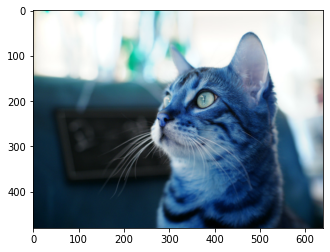

In [25]:
path = './cat.bmp'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# cv2.imread(path,cv2.IMREAD_COLOR).shape
# cv2.imread(path,cv2.IMREAD_GRAYSCALE).shape
# cv2.imread(path,cv2.IMREAD_ANYCOLOR).shape
# cv2.imread(path,cv2.IMREAD_UNCHANGED).shape
# cv2.imread(path,cv2.IMREAD_LOAD_GDAL).shape

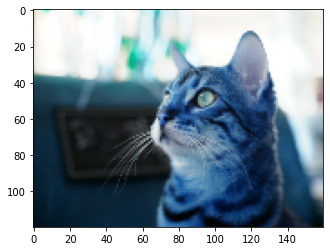

In [12]:
plt.imshow(cv2.imread(path,cv2.IMREAD_REDUCED_COLOR_4))


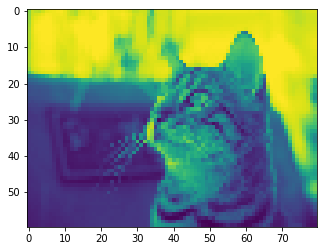

In [13]:
plt.imshow(cv2.imread(path,cv2.IMREAD_REDUCED_GRAYSCALE_8))


In [17]:
img = cv2.imread(path,cv2.IMREAD_COLOR)
print(img.shape)
print()
print(img.dtype)
print()
print(img.ndim)
print()
print(img[0])

(480, 640, 3)

uint8

3

[[191 190 170]
 [199 195 176]
 [205 201 182]
 ...
 [244 242 237]
 [244 242 237]
 [244 242 237]]


## 이미지 자르기

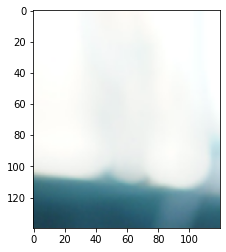

In [18]:
img_copy = img.copy()
img2 = img[40:180,30:150].copy()
plt.imshow(img2)

## 이미지연결, 사이즈조절, 명암조절

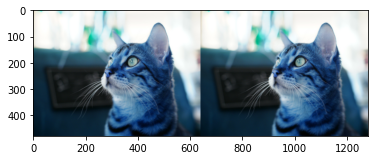

In [19]:
plt.imshow(cv2.hconcat([img,img_copy]))


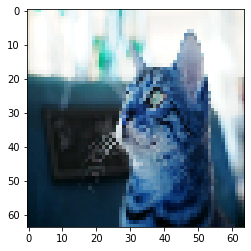

In [22]:
img_resize = cv2.resize(img,(64,64))
plt.imshow(img_resize)

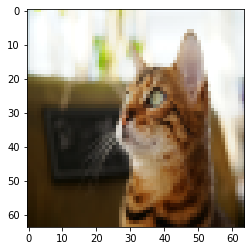

In [26]:
img_resize = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
plt.imshow(img_resize)

### resize 할경우 인터폴레이팅 방법
![ex_screenshot](./table_1.png)

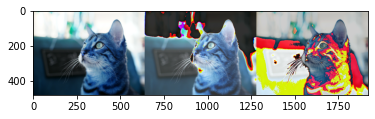

In [23]:
img_light = img + 50
img_dark = img - 50
plt.imshow(cv2.hconcat([img,img_light,img_dark]))

In [24]:
print(img[100][0])
print(img_light[100][0])

[218 212 199]
[ 12   6 249]


light의 경우 값이 넘어가서 어두워진다.

반대로 dark는 낮아져 음수가되면 다시 밝아진다.

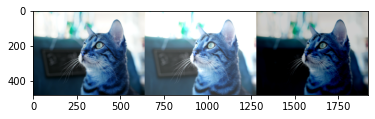

In [26]:
import numpy as np
img_light = np.clip(img.astype('int32') + 50,0,255).astype('uint8')
img_dark = np.clip(img.astype('int32') - 50,0,255).astype('uint8')
plt.imshow(cv2.hconcat([img,img_light,img_dark]))

numpy.clip(array, min, max)

    array 내의 element들에 대해서

    min 값 보다 작은 값들을 min값으로 바꿔주고

    max 값 보다 큰 값들을 max값으로 바꿔주는 함수.

## 회전

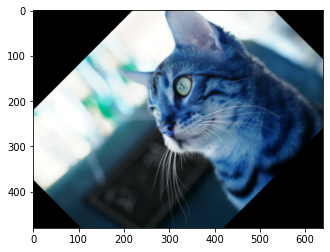

In [28]:
height, width, channel = img.shape
matrix = cv2.getRotationMatrix2D((width/2,height/2),45,1) # 변환행렬 : center,angle,scale
dst = cv2.warpAffine(img,matrix,(width,height))
plt.imshow(dst)

## 상하좌우 반전

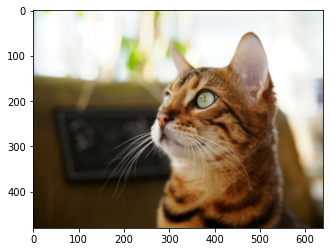

In [13]:
plt.imshow(img)

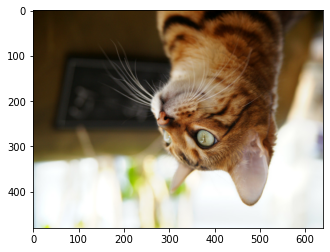

In [10]:
test = cv2.flip(img,0)
plt.imshow(test)

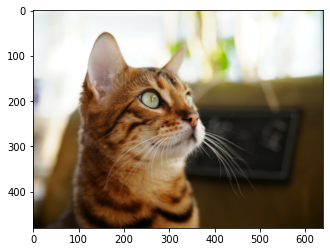

In [11]:
test = cv2.flip(img,1)
plt.imshow(test)

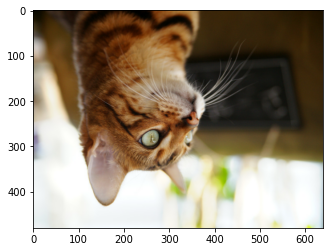

In [12]:
test = cv2.flip(img,-1)
plt.imshow(test)

## 컬러채널 조정

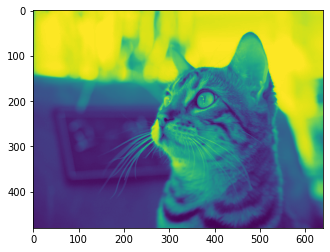

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY))

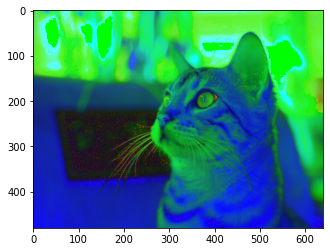

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2HLS))

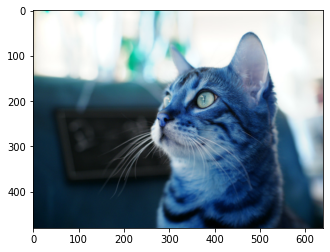

In [21]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

![ex_screenshot](./table_0.png)